In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
import numpy as np

from minisom import MiniSom

In [2]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-12-1','2018-1-31'))
yAll=yAll/25.0
yWd= yAll[yAll >0.44]
yWd

<xarray.DataArray 'fogdata' (time: 588)>
array([0.48, 0.52, 0.6 , 0.64, 0.6 , 0.6 , 0.48, 0.48, 0.48, 0.52, 0.48,
       0.48, 0.48, 0.6 , 0.48, 0.56, 0.48, 0.52, 0.48, 0.52, 0.48, 0.52,
       0.52, 0.56, 0.56, 0.64, 0.48, 0.48, 0.48, 0.6 , 0.52, 0.6 , 0.56,
       0.48, 0.6 , 0.6 , 0.56, 0.52, 0.48, 0.52, 0.48, 0.52, 0.48, 0.48,
       0.48, 0.52, 0.48, 0.52, 0.48, 0.48, 0.52, 0.56, 0.48, 0.6 , 0.6 ,
       0.6 , 0.48, 0.56, 0.48, 0.52, 0.56, 0.48, 0.56, 0.48, 0.48, 0.6 ,
       0.6 , 0.56, 0.6 , 0.48, 0.56, 0.56, 0.52, 0.48, 0.56, 0.52, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.48, 0.48,
       0.48, 0.6 , 0.72, 0.48, 0.68, 0.48, 0.56, 0.56, 0.52, 0.64, 0.68,
       0.52, 0.72, 0.64, 0.48, 0.72, 0.48, 0.48, 0.48, 0.48, 0.56, 0.48,
       0.48, 0.56, 0.56, 0.6 , 0.52, 0.48, 0.48, 0.48, 0.6 , 0.64, 0.56,
       0.6 , 0.64, 0.64, 0.52, 0.6 , 0.6 , 0.68, 0.52, 0.6 , 0.68, 0.56,
       0.52, 0.72, 0.6 , 0.64, 0.56, 0.52, 0.52, 0.48, 0.6 , 0.6 , 0.56,
       0.52, 0.52, 0.6 , 0.76, 0.84, 0.8 , 0.64, 0.8 , 0.64, 0.72, 0.76,
       0.76, 0.52, 0.52, 0.48, 0.48, 0.6 , 0.48, 0.48, 0.56, 0.52, 0.64,
       0.56, 0.56, 0.72, 0.88, 0.76, 0.52, 0.72, 0.72, 0.64, 0.52, 0.52,
       0.56, 0.56, 0.76, 0.68, 0.52, 0.56, 0.72, 0.72, 0.72, 0.68, 0.72,
       0.56, 0.52, 0.48, 0.52, 0.52, 0.56, 0.6 , 0.68, 0.68, 0.64, 0.68,
       0.92, 0.84, 0.64, 0.56, 0.52, 0.52, 0.48, 0.56, 0.52, 0.68, 0.64,
       0.52, 0.48, 0.64, 0.48, 0.84, 0.84, 0.6 , 0.52, 0.48, 0.64, 0.72,
...
       0.72, 0.56, 0.72, 0.68, 0.76, 0.6 , 0.68, 0.72, 0.72, 0.68, 0.72,
       0.76, 0.84, 0.84, 0.8 , 0.8 , 0.84, 0.68, 0.48, 0.52, 0.64, 0.68,
       0.64, 0.48, 0.48, 0.48, 0.48, 0.48, 0.6 , 0.72, 0.72, 0.68, 0.48,
       0.64, 0.76, 0.8 , 0.68, 0.6 , 0.56, 0.52, 0.56, 0.6 , 0.68, 0.52,
       0.56, 0.64, 0.64, 0.48, 0.48, 0.56, 0.68, 0.52, 0.6 , 0.48, 0.48,
       0.52, 0.48, 0.68, 0.64, 0.64, 0.56, 0.56, 0.56, 0.48, 0.64, 0.6 ,
       0.52, 0.56, 0.52, 0.52, 0.6 , 0.52, 0.48, 0.76, 0.6 , 0.68, 0.64,
       0.48, 0.48, 0.64, 0.48, 0.6 , 0.72, 0.68, 0.56, 0.48, 0.56, 0.56,
       0.52, 0.56, 0.56, 0.64, 0.72, 0.6 , 0.8 , 0.8 , 0.76, 0.72, 0.6 ,
       0.68, 0.8 , 0.76, 0.72, 0.76, 0.48, 0.64, 0.68, 0.56, 0.48, 0.56,
       0.52, 0.56, 0.52, 0.52, 0.64, 0.72, 0.48, 0.6 , 0.52, 0.52, 0.52,
       0.6 , 0.64, 0.6 , 0.48, 0.48, 0.56, 0.56, 0.48, 0.48, 0.52, 0.52,
       0.48, 0.56, 0.76, 0.6 , 0.48, 0.52, 0.48, 0.48, 0.6 , 0.6 , 0.72,
       0.48, 0.56, 0.72, 0.76, 0.8 , 0.64, 0.64, 0.72, 0.76, 0.76, 0.76,
       0.52, 0.52, 0.68, 0.6 , 0.68, 0.68, 0.68, 0.52, 0.56, 0.64, 0.64,
       0.68, 0.64, 0.64, 0.64, 0.64, 0.8 , 0.8 , 0.72, 0.48, 0.48, 0.56,
       0.64, 0.56, 0.72, 0.72, 0.52, 0.56, 0.6 , 0.48, 0.52, 0.48, 0.64,
       0.6 , 0.56, 0.68, 0.68, 0.68, 0.76, 0.76, 0.6 , 0.68, 0.8 , 0.68,
       0.52, 0.68, 0.64, 0.48, 0.48, 0.52, 0.52, 0.68, 0.68, 0.56, 0.48,
       0.56, 0.64, 0.6 , 0.64, 0.64])
Coordinates:
  * time     (time) datetime64[ns] 1983-01-04 1983-01-05 ... 2018-01-29

In [45]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
z500Data
z=z500Data.z.shift(time=1)
z.values=z.values/9.81
#z

In [46]:
da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(70,0),longitude=slice(30,120))
yAll['time'] = decJanAnomz.time
wfdZAnom=decJanAnomz[yAll >0.44,:,:]
wfdZAnom

<xarray.DataArray 'z' (time: 588, latitude: 36, longitude: 46)>
array([[[ 3.78964844e+01,  5.59047852e+01,  7.28525391e+01, ...,
         -9.57773438e+01, -1.02249023e+02, -1.07085449e+02],
        [ 4.94755859e+01,  6.58569336e+01,  8.22250977e+01, ...,
         -1.53792969e+02, -1.58804688e+02, -1.61038086e+02],
        [ 5.26899414e+01,  6.62968750e+01,  8.14438477e+01, ...,
         -1.95109375e+02, -2.02114746e+02, -2.03596191e+02],
        ...,
        [ 5.72509766e+00,  6.79541016e+00,  7.29980469e+00, ...,
          2.72412109e+00,  2.38378906e+00,  1.93798828e+00],
        [ 8.27783203e+00,  8.73291016e+00,  7.84716797e+00, ...,
          1.76367188e+00,  1.60400391e+00,  1.87597656e+00],
        [ 7.05029297e+00,  7.27441406e+00,  7.75537109e+00, ...,
          1.15185547e+00,  9.79003906e-01,  1.71240234e+00]],

       [[ 2.53637695e+01,  3.53139648e+01,  4.35688477e+01, ...,
         -1.34467773e+01, -2.91669922e+01, -4.17338867e+01],
        [ 2.73232422e+01,  3.37119141e+01,  3.73588867e+01, ...,
         -6.70117188e+01, -8.18100586e+01, -8.89824219e+01],
        [ 3.22797852e+01,  3.71723633e+01,  4.06469727e+01, ...,
         -1.16485840e+02, -1.23368652e+02, -1.19005859e+02],
...
         -1.08027344e+01, -1.27788086e+01, -1.25429688e+01],
        [-5.77294922e+00, -5.56689453e+00, -5.16650391e+00, ...,
         -1.25375977e+01, -1.51201172e+01, -1.58076172e+01],
        [-6.87255859e+00, -6.20263672e+00, -5.65820312e+00, ...,
         -1.18540039e+01, -1.37441406e+01, -1.63613281e+01]],

       [[ 1.04713867e+02,  1.00210938e+02,  9.46679688e+01, ...,
          3.32680664e+01,  3.70766602e+01,  3.81147461e+01],
        [ 9.91450195e+01,  9.55063477e+01,  9.15458984e+01, ...,
          3.83071289e+01,  3.91064453e+01,  3.58100586e+01],
        [ 9.31220703e+01,  9.32265625e+01,  9.23642578e+01, ...,
          3.91879883e+01,  3.49658203e+01,  2.61201172e+01],
        ...,
        [ 3.04541016e+00,  3.05761719e+00,  3.61328125e-01, ...,
         -1.15571289e+01, -1.32373047e+01, -1.41997070e+01],
        [ 1.86962891e+00,  1.06298828e+00, -1.52636719e+00, ...,
         -1.23105469e+01, -1.53500977e+01, -1.59570312e+01],
        [ 1.90429688e-01, -6.24023438e-01, -1.35449219e+00, ...,
         -1.26508789e+01, -1.40712891e+01, -1.59692383e+01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 30.0 32.0 34.0 36.0 ... 116.0 118.0 120.0
  * latitude   (latitude) float32 70.0 68.0 66.0 64.0 62.0 ... 6.0 4.0 2.0 0.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'

In [115]:
decJanz=z[(z.time.dt.month>11) | (z.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(35,0),longitude=slice(70,95))
yAll['time'] = decJanz.time
# get WFD daily anomaly
wfdZ=decJanz[yAll >0.44,:,:]

In [116]:
wfdZ

<xarray.DataArray 'z' (time: 588, latitude: 18, longitude: 13)>
array([[[5708.5586, 5701.7095, 5693.62  , ..., 5625.2007, 5611.3486,
         5599.912 ],
        [5745.9927, 5735.6646, 5723.297 , ..., 5643.641 , 5633.1357,
         5621.9204],
        [5781.255 , 5770.8823, 5755.8555, ..., 5654.1465, 5643.7075,
         5626.176 ],
        ...,
        [5870.375 , 5870.3306, 5869.4883, ..., 5863.837 , 5863.5044,
         5861.687 ],
        [5869.4   , 5870.0645, 5868.314 , ..., 5866.585 , 5863.46  ,
         5861.2217],
        [5870.2646, 5869.5547, 5868.2695, ..., 5866.873 , 5866.4966,
         5862.662 ]],

       [[5688.478 , 5691.0713, 5688.7217, ..., 5635.4624, 5626.819 ,
         5619.6377],
        [5733.2485, 5729.1484, 5721.9453, ..., 5653.548 , 5648.628 ,
         5640.8926],
        [5773.631 , 5767.0483, 5756.875 , ..., 5668.3096, 5663.123 ,
         5650.999 ],
...
        [5840.1885, 5841.4736, 5841.1636, ..., 5846.682 , 5846.261 ,
         5846.505 ],
        [5841.341 , 5840.3213, 5840.3657, ..., 5844.8203, 5844.4214,
         5845.33  ],
        [5842.471 , 5842.227 , 5841.5845, ..., 5841.8726, 5841.917 ,
         5843.7344]],

       [[5626.6855, 5632.1157, 5635.13  , ..., 5590.6255, 5584.73  ,
         5583.999 ],
        [5667.2896, 5670.947 , 5671.456 , ..., 5620.4355, 5613.432 ,
         5608.113 ],
        [5710.9077, 5713.7   , 5712.57  , ..., 5645.7686, 5638.6543,
         5632.3374],
        ...,
        [5848.012 , 5847.746 , 5846.8374, ..., 5848.056 , 5848.5215,
         5849.253 ],
        [5848.965 , 5848.3887, 5847.79  , ..., 5845.995 , 5846.904 ,
         5847.48  ],
        [5849.32  , 5848.8765, 5847.8125, ..., 5846.283 , 5847.4136,
         5847.192 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 70.0 72.0 74.0 76.0 ... 88.0 90.0 92.0 94.0
  * latitude   (latitude) float32 34.0 32.0 30.0 28.0 26.0 ... 6.0 4.0 2.0 0.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

In [117]:
#decJanz

In [118]:
data=wfdZ.stack(z=( "latitude","longitude"))

# Data normalization
data=(data - np.mean(data, axis=0)) / np.std(data, axis=0)

#tolist()
#len(data[0])

data = data.values
data

array([[ 0.5953708 ,  0.44915855,  0.28292915, ...,  0.81567955,
         0.7982277 ,  0.51901853],
       [ 0.26332188,  0.27078053,  0.19866274, ...,  0.31751463,
         0.3640571 ,  0.37130728],
       [-0.17463553, -0.09304934, -0.12618122, ...,  0.33133778,
         0.43325615,  0.40431067],
       ...,
       [-0.7412382 , -1.0091248 , -1.2970743 , ..., -1.3407313 ,
        -1.2911947 , -1.2292806 ],
       [-0.9373106 , -1.0414567 , -1.2063316 , ..., -1.128713  ,
        -1.1199499 , -0.96513855],
       [-0.7584684 , -0.71776944, -0.7232614 , ..., -0.7856788 ,
        -0.6909997 , -0.6940284 ]], dtype=float32)

In [119]:
n_row=2
m_col=2
som = MiniSom(n_row, m_col, len(data[0]),neighborhood_function='gaussian', random_seed=50)
#som.pca_weights_init(data)
som.train(data, 100000, verbose=False)  # random training

In [120]:
label=[]
for x in data :
    intlabel=som.winner(x)
    label.append(str(intlabel[0])+"_"+str(intlabel[1]))

#label    

In [121]:
wfdZS=wfdZAnom.assign_coords(somlabel=('time',label))
#wfdZS.somlabel
wfdZS[wfdZS.somlabel=='0_0'].time

<xarray.DataArray 'time' (time: 198)>
array(['1983-01-12T09:00:00.000000000', '1987-01-19T09:00:00.000000000',
       '1987-12-15T09:00:00.000000000', '1987-12-16T09:00:00.000000000',
       '1987-12-17T09:00:00.000000000', '1987-12-26T09:00:00.000000000',
       '1987-12-27T09:00:00.000000000', '1987-12-28T09:00:00.000000000',
       '1987-12-31T09:00:00.000000000', '1988-01-01T09:00:00.000000000',
       '1988-01-06T09:00:00.000000000', '1990-01-13T09:00:00.000000000',
       '1992-01-08T09:00:00.000000000', '1993-01-01T09:00:00.000000000',
       '1993-01-02T09:00:00.000000000', '1994-12-02T09:00:00.000000000',
       '1994-12-05T09:00:00.000000000', '1994-12-06T09:00:00.000000000',
       '1995-12-28T09:00:00.000000000', '1997-01-02T09:00:00.000000000',
       '1997-12-12T09:00:00.000000000', '1997-12-13T09:00:00.000000000',
       '1997-12-16T09:00:00.000000000', '1997-12-18T09:00:00.000000000',
       '1997-12-19T09:00:00.000000000', '1997-12-23T09:00:00.000000000',
       '1997-12-24T09:00:00.000000000', '1997-12-27T09:00:00.000000000',
       '1998-01-07T09:00:00.000000000', '1998-01-08T09:00:00.000000000',
       '1998-01-09T09:00:00.000000000', '1998-12-17T09:00:00.000000000',
       '1998-12-18T09:00:00.000000000', '1998-12-26T09:00:00.000000000',
       '1998-12-27T09:00:00.000000000', '1998-12-28T09:00:00.000000000',
       '1998-12-29T09:00:00.000000000', '1998-12-30T09:00:00.000000000',
       '1999-12-24T09:00:00.000000000', '1999-12-25T09:00:00.000000000',
       '2001-12-10T09:00:00.000000000', '2001-12-13T09:00:00.000000000',
       '2001-12-14T09:00:00.000000000', '2001-12-15T09:00:00.000000000',
       '2001-12-16T09:00:00.000000000', '2001-12-17T09:00:00.000000000',
       '2001-12-18T09:00:00.000000000', '2001-12-19T09:00:00.000000000',
       '2001-12-20T09:00:00.000000000', '2001-12-21T09:00:00.000000000',
       '2001-12-22T09:00:00.000000000', '2001-12-24T09:00:00.000000000',
       '2001-12-25T09:00:00.000000000', '2001-12-27T09:00:00.000000000',
       '2001-12-28T09:00:00.000000000', '2001-12-29T09:00:00.000000000',
       '2002-01-03T09:00:00.000000000', '2002-01-04T09:00:00.000000000',
       '2003-01-03T09:00:00.000000000', '2003-01-04T09:00:00.000000000',
       '2003-01-05T09:00:00.000000000', '2003-01-06T09:00:00.000000000',
       '2003-01-07T09:00:00.000000000', '2003-01-08T09:00:00.000000000',
       '2003-01-10T09:00:00.000000000', '2003-01-11T09:00:00.000000000',
       '2003-01-15T09:00:00.000000000', '2003-01-16T09:00:00.000000000',
       '2003-01-17T09:00:00.000000000', '2003-01-18T09:00:00.000000000',
       '2003-01-19T09:00:00.000000000', '2003-01-20T09:00:00.000000000',
       '2003-01-21T09:00:00.000000000', '2003-01-22T09:00:00.000000000',
       '2003-12-09T09:00:00.000000000', '2003-12-21T09:00:00.000000000',
       '2003-12-22T09:00:00.000000000', '2003-12-23T09:00:00.000000000',
       '2003-12-30T09:00:00.000000000', '2003-12-31T09:00:00.000000000',
       '2004-01-01T09:00:00.000000000', '2004-01-10T09:00:00.000000000',
       '2004-01-11T09:00:00.000000000', '2004-01-12T09:00:00.000000000',
       '2004-12-12T09:00:00.000000000', '2004-12-13T09:00:00.000000000',
       '2004-12-14T09:00:00.000000000', '2004-12-17T09:00:00.000000000',
       '2004-12-18T09:00:00.000000000', '2004-12-19T09:00:00.000000000',
       '2005-12-28T09:00:00.000000000', '2006-12-19T09:00:00.000000000',
       '2006-12-23T09:00:00.000000000', '2006-12-24T09:00:00.000000000',
       '2006-12-29T09:00:00.000000000', '2006-12-30T09:00:00.000000000',
       '2006-12-31T09:00:00.000000000', '2007-01-01T09:00:00.000000000',
       '2007-01-02T09:00:00.000000000', '2007-01-03T09:00:00.000000000',
       '2007-01-27T09:00:00.000000000', '2007-01-28T09:00:00.000000000',
       '2007-12-24T09:00:00.000000000', '2008-12-10T09:00:00.000000000',
       '2008-12-11T09:00:00.000000000', '2008-12-18T09:00:00.000000000',
       '2008-12-19T09:00:00.000000000', '2008-12-20T09:00:00.000000000',
       '2008-12-21T0

In [122]:
soms=wfdZS.groupby('somlabel').mean()
som1=soms.sel(somlabel='0_0')
som2=soms.sel(somlabel='0_1')
som3=soms.sel(somlabel='1_0')
som4=soms.sel(somlabel='1_1')
#som5=soms.sel(somlabel='1_0')
#som6=soms.sel(somlabel='1_1')
#som7=soms.sel(somlabel='1_2')
#som8=soms.sel(somlabel='1_3')


In [123]:
soms_n=wfdZS.groupby('somlabel').count()
soms_n[:,0,0]

<xarray.DataArray 'z' (somlabel: 4)>
array([198, 133, 112, 145])
Coordinates:
    longitude  float32 30.0
    latitude   float32 70.0
  * somlabel   (somlabel) object '0_0' '0_1' '1_0' '1_1'

In [124]:
som1_cube=som1.to_iris()
som2_cube=som2.to_iris()
som3_cube=som3.to_iris()
som4_cube=som4.to_iris()
#som5_cube=som5.to_iris()
#som6_cube=som6.to_iris()
#som7_cube=som5.to_iris()
#som8_cube=som6.to_iris()




In [125]:
wfdZS[wfdZS.somlabel=='0_0'].time.values

array(['1983-01-12T09:00:00.000000000', '1987-01-19T09:00:00.000000000',
       '1987-12-15T09:00:00.000000000', '1987-12-16T09:00:00.000000000',
       '1987-12-17T09:00:00.000000000', '1987-12-26T09:00:00.000000000',
       '1987-12-27T09:00:00.000000000', '1987-12-28T09:00:00.000000000',
       '1987-12-31T09:00:00.000000000', '1988-01-01T09:00:00.000000000',
       '1988-01-06T09:00:00.000000000', '1990-01-13T09:00:00.000000000',
       '1992-01-08T09:00:00.000000000', '1993-01-01T09:00:00.000000000',
       '1993-01-02T09:00:00.000000000', '1994-12-02T09:00:00.000000000',
       '1994-12-05T09:00:00.000000000', '1994-12-06T09:00:00.000000000',
       '1995-12-28T09:00:00.000000000', '1997-01-02T09:00:00.000000000',
       '1997-12-12T09:00:00.000000000', '1997-12-13T09:00:00.000000000',
       '1997-12-16T09:00:00.000000000', '1997-12-18T09:00:00.000000000',
       '1997-12-19T09:00:00.000000000', '1997-12-23T09:00:00.000000000',
       '1997-12-24T09:00:00.000000000', '1997-12-27

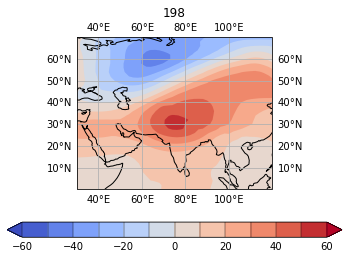

In [126]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som1_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)
plt.title(soms_n[0,0,0].values)
plt.show()

In [127]:
wfdZS[wfdZS.somlabel=='0_1'].time

<xarray.DataArray 'time' (time: 133)>
array(['1983-01-04T09:00:00.000000000', '1983-01-05T09:00:00.000000000',
       '1983-01-06T09:00:00.000000000', '1983-01-07T09:00:00.000000000',
       '1983-01-08T09:00:00.000000000', '1983-01-09T09:00:00.000000000',
       '1984-01-04T09:00:00.000000000', '1987-01-14T09:00:00.000000000',
       '1987-01-22T09:00:00.000000000', '1987-01-23T09:00:00.000000000',
       '1988-01-07T09:00:00.000000000', '1988-01-13T09:00:00.000000000',
       '1988-01-15T09:00:00.000000000', '1989-12-30T09:00:00.000000000',
       '1991-01-09T09:00:00.000000000', '1992-01-09T09:00:00.000000000',
       '1992-01-23T09:00:00.000000000', '1993-01-04T09:00:00.000000000',
       '1995-01-07T09:00:00.000000000', '1995-12-27T09:00:00.000000000',
       '1995-12-29T09:00:00.000000000', '1995-12-30T09:00:00.000000000',
       '1996-01-01T09:00:00.000000000', '1996-01-02T09:00:00.000000000',
       '1996-01-04T09:00:00.000000000', '1997-12-11T09:00:00.000000000',
       '1997-12-14T09:00:00.000000000', '1997-12-15T09:00:00.000000000',
       '1997-12-25T09:00:00.000000000', '1997-12-26T09:00:00.000000000',
       '1997-12-28T09:00:00.000000000', '1997-12-29T09:00:00.000000000',
       '1997-12-31T09:00:00.000000000', '1998-01-10T09:00:00.000000000',
       '1999-01-17T09:00:00.000000000', '2001-12-11T09:00:00.000000000',
       '2001-12-30T09:00:00.000000000', '2001-12-31T09:00:00.000000000',
       '2002-01-02T09:00:00.000000000', '2002-01-05T09:00:00.000000000',
       '2002-01-09T09:00:00.000000000', '2002-12-26T09:00:00.000000000',
       '2002-12-27T09:00:00.000000000', '2002-12-28T09:00:00.000000000',
       '2002-12-30T09:00:00.000000000', '2003-01-01T09:00:00.000000000',
       '2003-01-02T09:00:00.000000000', '2003-01-09T09:00:00.000000000',
       '2003-01-12T09:00:00.000000000', '2003-01-13T09:00:00.000000000',
       '2003-01-14T09:00:00.000000000', '2003-01-23T09:00:00.000000000',
       '2003-01-30T09:00:00.000000000', '2003-12-18T09:00:00.000000000',
       '2003-12-19T09:00:00.000000000', '2003-12-20T09:00:00.000000000',
       '2003-12-24T09:00:00.000000000', '2003-12-25T09:00:00.000000000',
       '2003-12-26T09:00:00.000000000', '2003-12-29T09:00:00.000000000',
       '2004-01-02T09:00:00.000000000', '2004-01-03T09:00:00.000000000',
       '2004-01-04T09:00:00.000000000', '2004-01-05T09:00:00.000000000',
       '2004-01-06T09:00:00.000000000', '2004-01-13T09:00:00.000000000',
       '2004-01-14T09:00:00.000000000', '2004-01-16T09:00:00.000000000',
       '2004-01-17T09:00:00.000000000', '2004-01-18T09:00:00.000000000',
       '2004-12-26T09:00:00.000000000', '2006-01-18T09:00:00.000000000',
       '2006-12-12T09:00:00.000000000', '2009-01-10T09:00:00.000000000',
       '2009-01-11T09:00:00.000000000', '2009-01-12T09:00:00.000000000',
       '2010-01-10T09:00:00.000000000', '2010-01-20T09:00:00.000000000',
       '2010-01-24T09:00:00.000000000', '2010-01-25T09:00:00.000000000',
       '2010-01-26T09:00:00.000000000', '2010-01-27T09:00:00.000000000',
       '2012-01-03T09:00:00.000000000', '2012-01-04T09:00:00.000000000',
       '2012-01-05T09:00:00.000000000', '2012-01-06T09:00:00.000000000',
       '2012-01-07T09:00:00.000000000', '2012-01-08T09:00:00.000000000',
       '2012-01-10T09:00:00.000000000', '2013-01-04T09:00:00.000000000',
       '2013-01-05T09:00:00.000000000', '2013-01-06T09:00:00.000000000',
       '2013-01-07T09:00:00.000000000', '2013-01-08T09:00:00.000000000',
       '2013-01-09T09:00:00.000000000', '2013-01-14T09:00:00.000000000',
       '2013-01-22T09:00:00.000000000', '2013-01-23T09:00:00.000000000',
       '2013-01-24T09:00:00.000000000', '2013-01-25T09:00:00.000000000',
       '2013-01-28T09:00:00.000000000', '2013-01-29T09:00:00.000000000',
       '2013-12-20T09:00:00.000000000', '2013-12-21T09:00:00.000000000',
       '2013-12-23T09:00:00.000000000', '2014-01-09T09:00:00.000000000',
       '2014-01-12T09:00:00.000000000', '2014-01-15T09:00:00.000000000',
       '2014-01-16T0

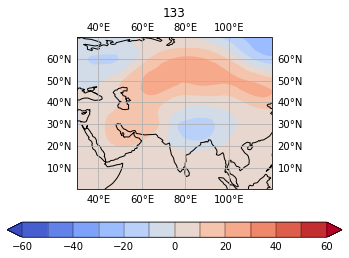

In [128]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som2_cube, cmap='coolwarm',extend='both',levels=levels)
#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)
plt.title(soms_n[1,0,0].values)

plt.show()

In [129]:
wfdZS[wfdZS.somlabel=='1_0'].time

<xarray.DataArray 'time' (time: 112)>
array(['1986-01-07T09:00:00.000000000', '1989-12-13T09:00:00.000000000',
       '1990-01-07T09:00:00.000000000', '1994-12-04T09:00:00.000000000',
       '1996-01-09T09:00:00.000000000', '1997-01-03T09:00:00.000000000',
       '1997-01-04T09:00:00.000000000', '1997-01-11T09:00:00.000000000',
       '1998-12-19T09:00:00.000000000', '1998-12-20T09:00:00.000000000',
       '1998-12-23T09:00:00.000000000', '1998-12-24T09:00:00.000000000',
       '1998-12-25T09:00:00.000000000', '1998-12-31T09:00:00.000000000',
       '1999-01-01T09:00:00.000000000', '1999-01-02T09:00:00.000000000',
       '1999-01-03T09:00:00.000000000', '1999-01-04T09:00:00.000000000',
       '1999-01-18T09:00:00.000000000', '1999-12-26T09:00:00.000000000',
       '1999-12-27T09:00:00.000000000', '1999-12-28T09:00:00.000000000',
       '1999-12-29T09:00:00.000000000', '1999-12-30T09:00:00.000000000',
       '2000-12-26T09:00:00.000000000', '2000-12-27T09:00:00.000000000',
       '2000-12-29T09:00:00.000000000', '2000-12-30T09:00:00.000000000',
       '2001-01-13T09:00:00.000000000', '2001-01-14T09:00:00.000000000',
       '2001-01-15T09:00:00.000000000', '2001-01-16T09:00:00.000000000',
       '2001-01-17T09:00:00.000000000', '2001-01-18T09:00:00.000000000',
       '2001-01-19T09:00:00.000000000', '2001-12-12T09:00:00.000000000',
       '2001-12-26T09:00:00.000000000', '2003-12-17T09:00:00.000000000',
       '2004-12-20T09:00:00.000000000', '2004-12-28T09:00:00.000000000',
       '2004-12-29T09:00:00.000000000', '2005-01-03T09:00:00.000000000',
       '2005-12-29T09:00:00.000000000', '2005-12-30T09:00:00.000000000',
       '2005-12-31T09:00:00.000000000', '2006-01-04T09:00:00.000000000',
       '2006-01-10T09:00:00.000000000', '2007-12-25T09:00:00.000000000',
       '2008-12-17T09:00:00.000000000', '2009-01-03T09:00:00.000000000',
       '2009-01-04T09:00:00.000000000', '2010-01-02T09:00:00.000000000',
       '2010-01-07T09:00:00.000000000', '2010-01-09T09:00:00.000000000',
       '2011-01-04T09:00:00.000000000', '2011-12-09T09:00:00.000000000',
       '2011-12-10T09:00:00.000000000', '2011-12-12T09:00:00.000000000',
       '2011-12-13T09:00:00.000000000', '2011-12-14T09:00:00.000000000',
       '2011-12-15T09:00:00.000000000', '2011-12-16T09:00:00.000000000',
       '2011-12-17T09:00:00.000000000', '2011-12-18T09:00:00.000000000',
       '2011-12-19T09:00:00.000000000', '2011-12-20T09:00:00.000000000',
       '2011-12-21T09:00:00.000000000', '2011-12-22T09:00:00.000000000',
       '2011-12-23T09:00:00.000000000', '2012-12-16T09:00:00.000000000',
       '2012-12-22T09:00:00.000000000', '2012-12-23T09:00:00.000000000',
       '2012-12-24T09:00:00.000000000', '2012-12-27T09:00:00.000000000',
       '2012-12-28T09:00:00.000000000', '2012-12-29T09:00:00.000000000',
       '2012-12-30T09:00:00.000000000', '2012-12-31T09:00:00.000000000',
       '2013-01-01T09:00:00.000000000', '2013-01-02T09:00:00.000000000',
       '2013-12-18T09:00:00.000000000', '2013-12-19T09:00:00.000000000',
       '2014-01-24T09:00:00.000000000', '2014-01-25T09:00:00.000000000',
       '2014-01-27T09:00:00.000000000', '2014-01-28T09:00:00.000000000',
       '2014-01-29T09:00:00.000000000', '2014-01-30T09:00:00.000000000',
       '2014-01-31T09:00:00.000000000', '2014-12-22T09:00:00.000000000',
       '2014-12-23T09:00:00.000000000', '2014-12-24T09:00:00.000000000',
       '2014-12-27T09:00:00.000000000', '2014-12-28T09:00:00.000000000',
       '2014-12-30T09:00:00.000000000', '2015-01-14T09:00:00.000000000',
       '2016-12-10T09:00:00.000000000', '2016-12-11T09:00:00.000000000',
       '2016-12-12T09:00:00.000000000', '2016-12-13T09:00:00.000000000',
       '2016-12-14T09:00:00.000000000', '2016-12-25T09:00:00.000000000',
       '2017-01-01T09:00:00.000000000', '2017-12-25T09:00:00.000000000',
       '2017-12-26T09:00:00.000000000', '2017-12-31T09:00:00.000000000',
       '2018-01-09T09:00:00.000000000', '2018-01-14T09:00:00.000000000',
       '2018-01-17T0

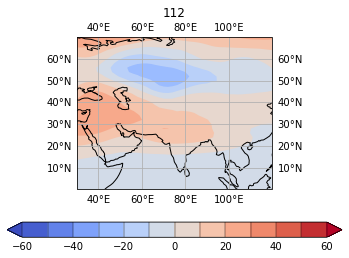

In [130]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som3_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.title(soms_n[2,0,0].values)
plt.gca().gridlines(draw_labels=True)

plt.show()

In [131]:
wfdZS[wfdZS.somlabel=='1_1'].time

<xarray.DataArray 'time' (time: 145)>
array(['1985-01-03T09:00:00.000000000', '1986-01-09T09:00:00.000000000',
       '1989-12-28T09:00:00.000000000', '1989-12-29T09:00:00.000000000',
       '1989-12-31T09:00:00.000000000', '1990-01-01T09:00:00.000000000',
       '1990-01-02T09:00:00.000000000', '1990-01-03T09:00:00.000000000',
       '1990-01-04T09:00:00.000000000', '1990-01-05T09:00:00.000000000',
       '1991-01-10T09:00:00.000000000', '1991-12-28T09:00:00.000000000',
       '1994-01-14T09:00:00.000000000', '1994-01-17T09:00:00.000000000',
       '1994-01-18T09:00:00.000000000', '1994-01-19T09:00:00.000000000',
       '1994-01-20T09:00:00.000000000', '1995-01-12T09:00:00.000000000',
       '1995-01-13T09:00:00.000000000', '1995-01-14T09:00:00.000000000',
       '1995-12-31T09:00:00.000000000', '1996-01-05T09:00:00.000000000',
       '1996-01-06T09:00:00.000000000', '1996-01-07T09:00:00.000000000',
       '1996-01-10T09:00:00.000000000', '1996-01-11T09:00:00.000000000',
       '1996-01-12T09:00:00.000000000', '1996-01-18T09:00:00.000000000',
       '1996-01-19T09:00:00.000000000', '1997-01-05T09:00:00.000000000',
       '1997-01-06T09:00:00.000000000', '1997-01-07T09:00:00.000000000',
       '1997-01-08T09:00:00.000000000', '1997-01-09T09:00:00.000000000',
       '1997-01-12T09:00:00.000000000', '1997-01-15T09:00:00.000000000',
       '1997-01-21T09:00:00.000000000', '1997-01-22T09:00:00.000000000',
       '1998-12-21T09:00:00.000000000', '1999-01-12T09:00:00.000000000',
       '1999-01-13T09:00:00.000000000', '1999-01-14T09:00:00.000000000',
       '1999-01-19T09:00:00.000000000', '1999-01-20T09:00:00.000000000',
       '1999-01-21T09:00:00.000000000', '1999-01-22T09:00:00.000000000',
       '1999-12-31T09:00:00.000000000', '2000-01-01T09:00:00.000000000',
       '2000-01-02T09:00:00.000000000', '2000-01-03T09:00:00.000000000',
       '2000-01-04T09:00:00.000000000', '2000-01-05T09:00:00.000000000',
       '2000-01-06T09:00:00.000000000', '2000-01-07T09:00:00.000000000',
       '2000-01-08T09:00:00.000000000', '2000-01-09T09:00:00.000000000',
       '2000-01-14T09:00:00.000000000', '2000-01-23T09:00:00.000000000',
       '2000-01-24T09:00:00.000000000', '2001-01-02T09:00:00.000000000',
       '2001-01-03T09:00:00.000000000', '2001-01-08T09:00:00.000000000',
       '2001-01-09T09:00:00.000000000', '2001-01-10T09:00:00.000000000',
       '2001-01-11T09:00:00.000000000', '2001-01-12T09:00:00.000000000',
       '2002-01-01T09:00:00.000000000', '2002-01-06T09:00:00.000000000',
       '2002-01-07T09:00:00.000000000', '2002-12-23T09:00:00.000000000',
       '2002-12-24T09:00:00.000000000', '2002-12-25T09:00:00.000000000',
       '2003-01-24T09:00:00.000000000', '2003-01-25T09:00:00.000000000',
       '2003-01-26T09:00:00.000000000', '2003-12-27T09:00:00.000000000',
       '2003-12-28T09:00:00.000000000', '2004-01-07T09:00:00.000000000',
       '2004-01-08T09:00:00.000000000', '2004-01-15T09:00:00.000000000',
       '2004-01-19T09:00:00.000000000', '2004-01-20T09:00:00.000000000',
       '2004-01-21T09:00:00.000000000', '2004-01-25T09:00:00.000000000',
       '2004-01-26T09:00:00.000000000', '2004-12-21T09:00:00.000000000',
       '2004-12-22T09:00:00.000000000', '2004-12-23T09:00:00.000000000',
       '2004-12-24T09:00:00.000000000', '2004-12-25T09:00:00.000000000',
       '2005-12-21T09:00:00.000000000', '2005-12-24T09:00:00.000000000',
       '2005-12-25T09:00:00.000000000', '2008-12-27T09:00:00.000000000',
       '2008-12-28T09:00:00.000000000', '2008-12-29T09:00:00.000000000',
       '2008-12-30T09:00:00.000000000', '2008-12-31T09:00:00.000000000',
       '2009-01-02T09:00:00.000000000', '2009-01-05T09:00:00.000000000',
       '2009-01-06T09:00:00.000000000', '2009-12-31T09:00:00.000000000',
       '2010-01-01T09:00:00.000000000', '2011-01-01T09:00:00.000000000',
       '2011-01-03T09:00:00.000000000', '2011-01-05T09:00:00.000000000',
       '2011-01-06T09:00:00.000000000', '2011-01-07T09:00:00.000000000',
       '2011-01-08T0

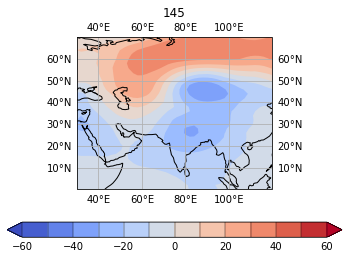

In [132]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som4_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.title(soms_n[3,0,0].values)
plt.gca().gridlines(draw_labels=True)

plt.show()

levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som5_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som6_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som7_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som8_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()